In [3]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# **Facebook**

In [4]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
FBdata_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Facebook'))

# Construct the path to the dataset
FBdataset_path = os.path.join(FBdata_dir, "Facebook_MD_Piedmont.csv")

# Read the dataset
FBdata = pd.read_csv(FBdataset_path)
FBdata.drop(['Unnamed: 0', 'country', 'polygon_source', 'polygon_name', 'polygon_id', 'all_day_ratio_single_tile_users', 'baseline_name', 'baseline_type'], axis=1, inplace=True)
FBdata.rename(columns = {'ds': 'date', 'all_day_bing_tiles_visited_relative_change': 'Facebook_movement_change'}, inplace=True)
FBdata['date'] = pd.to_datetime(FBdata['date'], dayfirst=False, format= '%Y-%m-%d')
FBdata.iloc[0:, 1] = FBdata.iloc[0:, 1]*100
FBdata.drop(FBdata.tail(4).index,inplace=True)
FBdata

,date,Facebook_movement_change
0,2020-03-01,-13.483
1,2020-03-02,-12.708
2,2020-03-03,-5.433
3,2020-03-04,-5.700
4,2020-03-05,-10.948
...,...,...
482,2021-06-26,-0.281
483,2021-06-27,-2.880
484,2021-06-28,-0.111
485,2021-06-29,-1.856


In [3]:
FBdata.isnull().sum()

date                        0
Facebook_movement_change    0
dtype: int64

In [4]:
FBdata.dtypes

date                        datetime64[ns]
Facebook_movement_change           float64
dtype: object

In [5]:
# FBAdata is missing only for some dates

In [6]:
FBdata['Facebook_movement_change_rolling'] = FBdata.Facebook_movement_change.rolling(7).mean()

# **Google**

In [7]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
Gdata_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Google'))

# Construct the path to the dataset
Gdataset_path = os.path.join(Gdata_dir, "Google_MD_Piedmont.csv")

# Read the dataset
Gdata = pd.read_csv(Gdataset_path)
Gdata['date'] = pd.to_datetime(Gdata['date'], dayfirst=True, format= '%d/%m/%Y')
Gdata.drop(['sub_region_1', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 
            'residential_percent_change_from_baseline'], axis=1, inplace=True)
Gdata.rename(columns = {'transit_stations_percent_change_from_baseline': 'Google_transit_stations', 'retail_and_recreation_percent_change_from_baseline': 'Google_shopping', 
                        'workplaces_percent_change_from_baseline': 'Google_offices'}, inplace=True)
Gdata

,date,Google_shopping,Google_transit_stations,Google_offices
0,2020-02-15,1,4,0
1,2020-02-16,1,7,1
2,2020-02-17,-1,0,0
3,2020-02-18,2,3,0
4,2020-02-19,1,0,0
...,...,...,...,...
497,2021-06-26,-18,-18,-12
498,2021-06-27,-19,-10,-5
499,2021-06-28,-8,-26,-25
500,2021-06-29,-8,-27,-25


In [8]:
Gdata.isnull().sum()

date                       0
Google_shopping            0
Google_transit_stations    0
Google_offices             0
dtype: int64

In [9]:
Gdata['Google_transit_stations_rolling'] = Gdata.Google_transit_stations.rolling(7).mean()
Gdata['Google_shopping_rolling'] = Gdata.Google_shopping.rolling(7).mean()
Gdata['Google_offices_rolling'] = Gdata.Google_offices.rolling(7).mean()

# **Apple**

In [10]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
Adata_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Apple'))

# Construct the path to the dataset
Adataset_path = os.path.join(Adata_dir, "Apple_MD_Piedmont_mean.csv")

# Read the dataset
Adata = pd.read_csv(Adataset_path, sep=';')
Adata.drop(['Unnamed: 0', 'Day_Of_Week', 'Piedmont_driving_mean', 'Piedmont_walking_mean', 'Piedmont_walking'], axis=1, inplace=True)
Adata['date'] = pd.to_datetime(Adata['date'], format= '%Y-%m-%d')
Adata.rename(columns = {'Piedmont_driving': 'Apple_driving'}, inplace=True)
Adata

,date,Apple_driving
0,2020-03-01,-22.58
1,2020-03-02,-12.75
2,2020-03-03,-8.78
3,2020-03-04,-15.51
4,2020-03-05,-17.25
...,...,...
488,2021-07-02,35.22
489,2021-07-03,29.81
490,2021-07-04,32.01
491,2021-07-05,39.59


In [11]:
Adata.isnull().sum()

date             0
Apple_driving    3
dtype: int64

In [12]:
Adata['Apple_driving_rolling'] = Adata.Apple_driving.rolling(7).mean()

In [13]:
data = Adata.merge(Gdata, left_on='date', right_on='date',how='outer').merge(FBdata, left_on='date', right_on='date', how='outer')
data

,date,Apple_driving,Apple_driving_rolling,Google_shopping,Google_transit_stations,Google_offices,Google_transit_stations_rolling,Google_shopping_rolling,Google_offices_rolling,Facebook_movement_change,Facebook_movement_change_rolling
0,2020-02-15,NaN,NaN,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,NaN,NaN,1.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,NaN,NaN,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,NaN,NaN,2.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
503,2021-07-02,35.22,36.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,2021-07-03,29.81,36.878571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,2021-07-04,32.01,35.811429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,2021-07-05,39.59,36.311429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.iloc[13:,:]
data

,date,Apple_driving,Apple_driving_rolling,Google_shopping,Google_transit_stations,Google_offices,Google_transit_stations_rolling,Google_shopping_rolling,Google_offices_rolling,Facebook_movement_change,Facebook_movement_change_rolling
13,2020-02-28,NaN,NaN,-8.0,-22.0,-17.0,-16.571429,-8.285714,-14.000000,NaN,NaN
14,2020-02-29,NaN,NaN,-12.0,-18.0,-7.0,-19.857143,-9.571429,-14.571429,NaN,NaN
15,2020-03-01,-22.58,NaN,-11.0,-14.0,-3.0,-22.285714,-10.000000,-15.142857,-13.483,NaN
16,2020-03-02,-12.75,NaN,-15.0,-29.0,-15.0,-23.428571,-11.285714,-14.285714,-12.708,NaN
17,2020-03-03,-8.78,NaN,-2.0,-20.0,-14.0,-22.571429,-10.142857,-13.285714,-5.433,NaN
...,...,...,...,...,...,...,...,...,...,...,...
503,2021-07-02,35.22,36.520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,2021-07-03,29.81,36.878571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,2021-07-04,32.01,35.811429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,2021-07-05,39.59,36.311429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **7-day rolling averages**

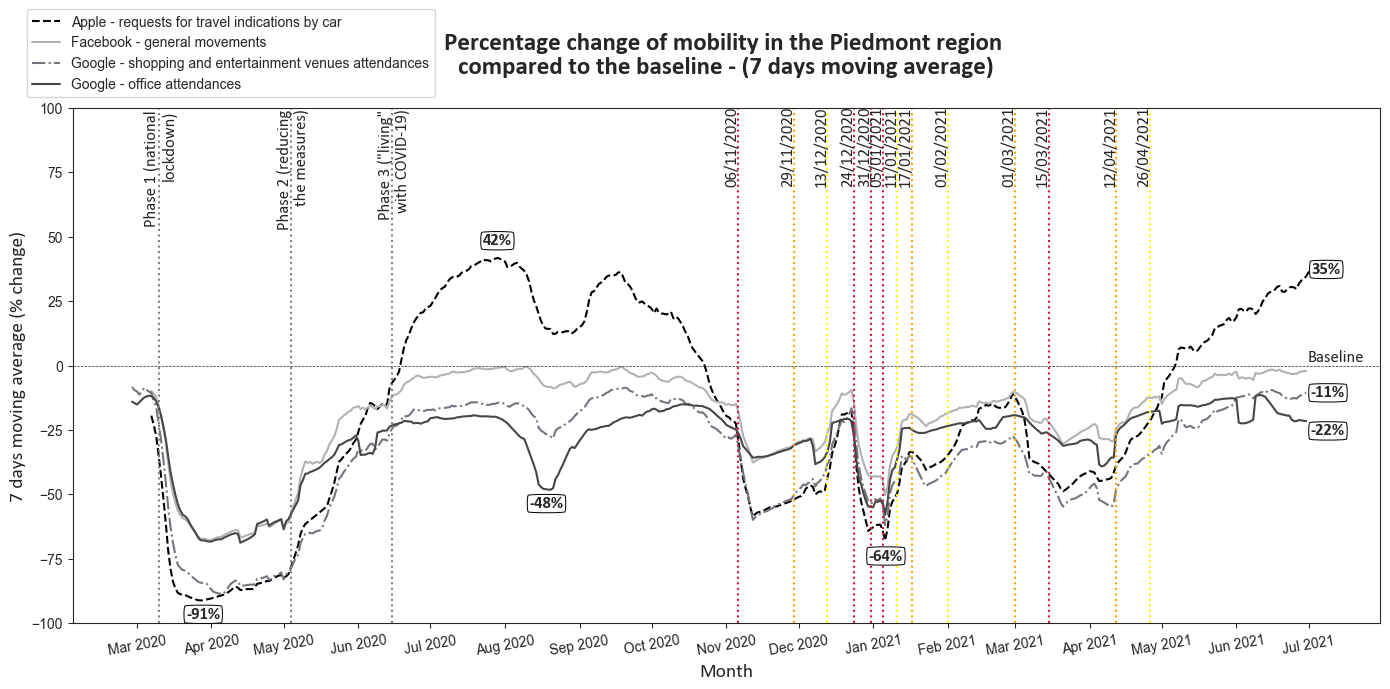

In [15]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')

fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(ax=ax, x="date", y='Apple_driving_rolling', label= 'Apple - requests for travel indications by car', data=data, errorbar=None, color='k', linestyle='--') #464646
sns.lineplot(ax=ax, x="date", y='Facebook_movement_change_rolling', label= 'Facebook - general movements', data=data, errorbar=None, color='#b1b2b7',linestyle='-') #blue
sns.lineplot(ax=ax, x="date", y='Google_shopping_rolling', label= 'Google - shopping and entertainment venues attendances', data=data, errorbar=None, color='#73747e', linestyle='-.') #73747e
sns.lineplot(ax=ax, x="date", y='Google_offices_rolling', label= 'Google - office attendances', data=data, errorbar=None, color='#464646', linestyle='-') #73747e

# axis labels
ax.set_title("Percentage change of mobility in the Piedmont region \ncompared to the baseline - (7 days moving average)", size=18, weight= 'bold', y=1.05, **cfont)
ax.set_xlabel("Month", size=14, **cfont)
ax.set_ylabel("7 days moving average (% change)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annot1 = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')], 
                            'y': [55, 54, 58]}, 
                           index=['Phase 1 (national\nlockdown)', 'Phase 2 (reducing\nthe measures)', 'Phase 3 ("living"\nwith COVID-19)'])
for t, p in annot1.iterrows():
    ax.annotate(text=t, xy=p, xytext=(13, 0), textcoords='offset points', rotation=90, fontsize=12, ha= 'right', **cfont)
    
annot2 = pd.DataFrame({'x': [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]}, 
                           index=['06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', '31/12/2020', '05/01/2021', '11/01/2021',
                                  '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annot2.iterrows():
    ax.annotate(text=t, xy=p, xytext=(1, 3), textcoords='offset points', rotation=90, fontsize=12, ha= 'right', **cfont)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

## APPLE DATA
ax.annotate('{:,d}%'.format(np.round(data['Apple_driving_rolling'].min()).astype(int)), 
            xy=(data[data['Apple_driving_rolling'] == data['Apple_driving_rolling'].min()].date.iloc[0],
                data['Apple_driving_rolling'].min()),
            xytext=(15, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 7].Apple_driving_rolling.max()).astype(int)), 
            xy=(data[data['Apple_driving_rolling'] == data[data.date.dt.month == 8].Apple_driving_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 8].Apple_driving_rolling.max()),
            xytext=(5, 20), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 12].Apple_driving_rolling.min()).astype(int)), 
            xy=(data[data['Apple_driving_rolling'] == data[data.date.dt.month == 12].Apple_driving_rolling.min()].date.iloc[0],
                data[data.date.dt.month == 12].Apple_driving_rolling.min()),
            xytext=(25, -13), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].Apple_driving_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].Apple_driving_rolling.iloc[0]),
            xytext=(25, 10), **cfont, **kw)

## FB DATA
#ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 11].Facebook_movement_change_rolling.max()).astype(int)), 
#            xy=(data[data['Facebook_movement_change_rolling'] == data[data.date.dt.month == 11].Facebook_movement_change_rolling.max()].date.iloc[0],
#                data[data.date.dt.month == 11].Facebook_movement_change_rolling.max()),
#            xytext=(35, 10), **cfont, **kw)

#ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 12].Facebook_movement_change_rolling.max()).astype(int)), 
#            xy=(data[data['Facebook_movement_change_rolling'] == data[data.date.dt.month == 12].Facebook_movement_change_rolling.max()].date.iloc[0],
#                data[data.date.dt.month == 12].Facebook_movement_change_rolling.max()),
#            xytext=(15, 15), **cfont, **kw)

#ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].Facebook_movement_change_rolling.iloc[0]).astype(int)), 
#            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].Facebook_movement_change_rolling.iloc[0]),
#            xytext=(25, 0), **cfont, **kw)

## GOOGLE DATA
ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 8].Google_offices_rolling.min()).astype(int)), 
            xy=(data[data['Google_offices_rolling'] == data[data.date.dt.month == 8].Google_offices_rolling.min()].date.iloc[0],
                data[data.date.dt.month == 8].Google_offices_rolling.min()),
            xytext=(11, -5), **cfont, **kw)

#ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 1].Google_shopping_rolling.min()).astype(int)), 
#            xy=(data[data['Google_shopping_rolling'] == data[data.date.dt.month == 1].Google_shopping_rolling.min()].date.iloc[0],
#                data[data.date.dt.month == 1].Google_shopping_rolling.min()),
#            xytext=(11, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].Google_offices_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].Google_offices_rolling.iloc[0]),
            xytext=(28, -2), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].Google_shopping_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].Google_shopping_rolling.iloc[0]),
            xytext=(28, 5), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=10)
plt.legend(loc=(-0.035,1.02))
fig.tight_layout()
plt.show()